In [65]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Script to run runme_terminus_sensitivity_basic.m tutorial translted from Matlab to Python with LHS
# Mikayla Pascual 06/28/22
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#import 
from MatlabFuncs import *
from model import *
from triangle import *
from bamg import bamg
from savevars import *
import plotdoc
from loadmodel import *
from os.path import exists

from scipy.io import loadmat
from m1qn3inversion import *
import numpy as np
from ContourToNodes import *
from solve import *

import lhsmdu
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [4]:
# Load some mat files to use later
vel_mat = loadmat('Cheat_matfiles/vel.mat')
hmaxVertices_mat = loadmat('Cheat_matfiles/hmaxVertices.mat')
param_mat = loadmat('Cheat_matfiles/param.mat')

velx = vel_mat['velx']
vely = vel_mat['vely']
vel = vel_mat['vel']

hmaxVertices = hmaxVertices_mat['hmaxVertices']

In [5]:
# Setup
region = 'SAtoES';
start_year = 1985;

# Mesh sizing
triangleresolution = 1000;
hmin = 300;
hmax = 10000;

# Mesh
md = model()
md = triangle(md,'./Exp/' +region+ '.exp',triangleresolution) # set up mesh

md = bamg(md,'hmin',hmin,'hmax',hmax,'field',vel,'err',2,'hmaxVertices',hmaxVertices);

#savevars('./Models/' +region+ '_mesh', 'md', md)

# 

/efs/issm/issm/trunk-jpl-denis/src/m/plot/plotmodel.py:123: MatplotlibDeprecationWarning: 
The 'add_all' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'add_all', they should be passed as keyword, not positionally.
  axgrid = ImageGrid(
findfont: Font family ['sans - serif'] not found. Falling back to DejaVu Sans.


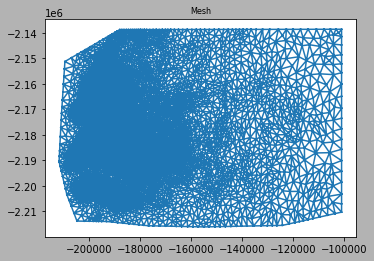

In [6]:
# Plot mesh
plotmodel(md,'data','mesh')

In [7]:
# Load and convert param_mat values
md.geometry.thickness = param_mat['geometry_thickness']
md.geometry.bed = param_mat['geometry_bed']
md.geometry.surface = param_mat['geometry_surface']
md.geometry.base = param_mat['geometry_base']
md.mask.ice_levelset = param_mat['mask_ice_levelset']
md.mask.groundedice_levelset = param_mat['mask_groundedice_levelset']
md.inversion.vx_obs = param_mat['inversion_vx_obs']
md.inversion.vy_obs = param_mat['inversion_vy_obs']
md.inversion.vel_obs = param_mat['inversion_vel_obs']
md.initialization.vx = param_mat['initialization_vx']
md.initialization.vy = param_mat['initialization_vy']
md.initialization.vz = param_mat['initialization_vz']
md.initialization.vel = param_mat['initialization_vel']
md.friction.coefficient = param_mat['friction_coefficient']
md.materials.rheology_n = param_mat['rheology_n']
md.materials.rheology_B = param_mat['rheology_B']
md.basalforcings.groundedice_melting_rate = param_mat['basalforcings_groundedice_melting_rate']
md.basalforcings.floatingice_melting_rate = param_mat['basalforcings_floatingice_melting_rate']
md.smb.mass_balance = param_mat['smb_mass_balance']
md.basalforcings.geothermalflux = param_mat['basalforcings_geothermalflux']
md.stressbalance.spcvx = param_mat['stressbalance_spcvx']
md.stressbalance.spcvy = param_mat['stressbalance_spcvy']
md.stressbalance.spcvz = param_mat['stressbalance_spcvz']
md.stressbalance.referential = param_mat['stressbalance_referential']
md.stressbalance.loadingforce = param_mat['stressbalance_loadingforce']
md.masstransport.spcthickness = param_mat['masstransport_spcthickness']

/efs/issm/issm/trunk-jpl-denis/src/m/plot/plotmodel.py:123: MatplotlibDeprecationWarning: 
The 'add_all' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'add_all', they should be passed as keyword, not positionally.
  axgrid = ImageGrid(


Too many axes present, we delete the overflow


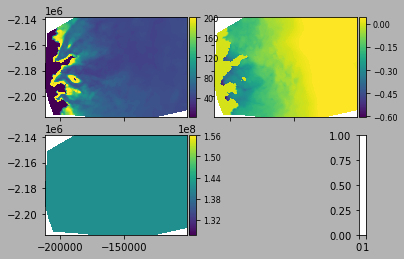

In [8]:
plotmodel(md, 'data', md.friction.coefficient, \
              'data', md.smb.mass_balance, \
              'data', md.materials.rheology_B)

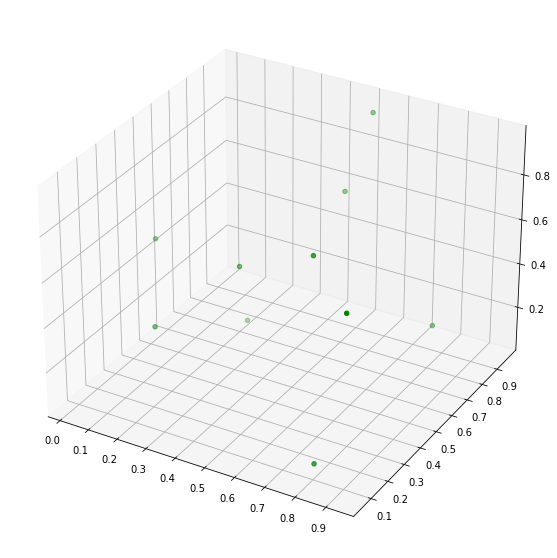

In [13]:
# from sahilm89/lhsmdu on Git

k = lhsmdu.sample(3, 10) # Latin Hypercube Sampling with multi-dimensional uniformity, 
                        # 3 variables with 10 samples each
k = np.array(k)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(0,1,0.1))
ax.scatter(k[0,:], k[1,:], k[2,:], color="g")
plt.show()

In [84]:
# Utilize LHS to vary model parameters

# collect -20% to 20% range
k = k * 0.4 - 0.2

# change initial model parameters to proportional LHS output
#friction_after = md.friction.coefficient + md.friction.coefficient * k[0]
#smb_mass_balance_after = md.smb.mass_balance + md.smb.mass_balance * k[1]
#materials_rheology_B_after = md.materials.rheology_B + md.materials.rheology_B * k[2]

data = {
    'friction_after': md.friction.coefficient + md.friction.coefficient * k[0],
    'smb_mass_balance_after': md.smb.mass_balance + md.smb.mass_balance * k[1],
    'materials_rheology_B_after': md.materials.rheology_B + md.materials.rheology_B * k[2]
}

In [73]:
# test ensemble 1 & 2 for plotting
friction_after_ens1 = friction_after[:,0]
smb_mass_balance_ens1 = smb_mass_balance_after[:,0]
materials_rheology_B_ens1 = materials_rheology_B_after[:,0]
friction_after_ens2 = friction_after[:,1]
smb_mass_balance_ens2 = smb_mass_balance_after[:,1]
materials_rheology_B_ens2 = materials_rheology_B_after[:,1]

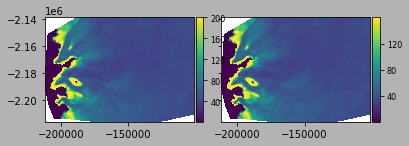

In [51]:
plotmodel(md, 'data', md.friction.coefficient, 'data', friction_after_ens1)

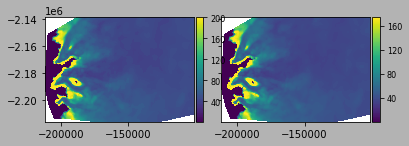

In [52]:
plotmodel(md, 'data', md.friction.coefficient, 'data', friction_after_ens2)

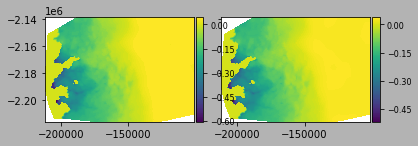

In [53]:
plotmodel(md, 'data', md.smb.mass_balance, 'data', smb_mass_balance_ens1)

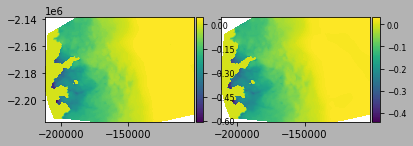

In [54]:
plotmodel(md, 'data', md.smb.mass_balance, 'data', smb_mass_balance_ens2)

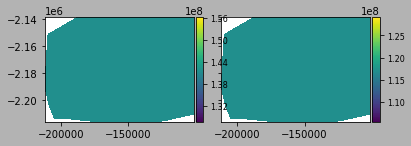

In [55]:
plotmodel(md, 'data', md.materials.rheology_B, 'data', materials_rheology_B_ens1)

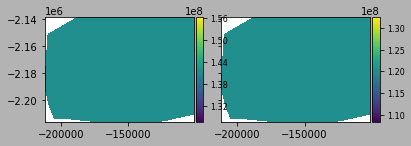

In [56]:
plotmodel(md, 'data', md.materials.rheology_B, 'data', materials_rheology_B_ens2)

In [91]:
# save pickle with issm module

with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary 
    pickle.dump(data, f)

In [92]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [93]:
friction_after

array([[84.52466468, 87.78155455, 84.70259631, ..., 82.91050797,
        81.01261606, 82.1334471 ],
       [ 0.7194129 ,  0.7471332 ,  0.72092733, ...,  0.70567437,
         0.68952088,  0.69906058],
       [ 0.7194129 ,  0.7471332 ,  0.72092733, ...,  0.70567437,
         0.68952088,  0.69906058],
       ...,
       [43.89862311, 45.59011732, 43.99103345, ..., 43.06029672,
        42.07460998, 42.65672337],
       [44.77810571, 46.503488  , 44.87236745, ..., 43.92298396,
        42.91754957, 43.51132526],
       [34.49938498, 35.82870936, 34.57200912, ..., 33.84055463,
        33.06591561, 33.52339133]])

In [94]:
data

{'friction_after': array([[78.72406961, 78.93251057, 78.73545724, ..., 78.62076359,
         78.4992985 , 78.57103169],
        [ 0.67004243,  0.67181652,  0.67013935, ...,  0.66916316,
          0.66812934,  0.66873988],
        [ 0.67004243,  0.67181652,  0.67013935, ...,  0.66916316,
          0.66812934,  0.66873988],
        ...,
        [40.88603338, 40.99428901, 40.89194764, ..., 40.83238049,
         40.76929654, 40.8065518 ],
        [41.70516056, 41.81558502, 41.71119331, ..., 41.65043277,
         41.58608497, 41.62408661],
        [32.13182797, 32.21690473, 32.13647591, ..., 32.08966283,
         32.04008593, 32.06936437]]),
 'smb_mass_balance_after': array([[-0.10036474, -0.09989114, -0.10044224, ..., -0.1002312 ,
         -0.10016105, -0.10001106],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-